In [146]:
import pandas as pd

hist = pd.read_csv('hist.csv', index_col=0)
recs = pd.read_csv('recs.csv', index_col=0)

In [147]:
import networkx as nx
import matplotlib.pyplot as plt

In [148]:
hist

,key,action,page_title,url,date,url_before_action,channel_sub_count,channel_url,dislike_count,like_count,posted_on,view_count,page_type,title,id,channel_name,recommendations,caption_tracks,search_term
Unnamed: 0,,,,,,,,,,,,,,,,,,,
0.0,2020-12-24-14.35.07.399,https://www.youtube.com/watch?v=RXABo9hm8B8,FORTNITE DANCE CHALLENGE! - (In Real Life) - Y...,https://www.youtube.com/watch?v=RXABo9hm8B8,2020-12-24 14:35:07,NaN,9.17M subscribers,https://www.youtube.com/channel/UCtZAaljDNIsIA...,"575,376 likes","575,376 likes","Apr 26, 2018","97,020,894 views",video,FORTNITE DANCE CHALLENGE! - (In Real Life),RXABo9hm8B8,The Bee Family,"[{'channel_name': 'The Bee Family', 'duration_...","[{'displayName': 'Arabic', 'id': None, 'is_def...",fortnite
1.0,2020-12-24-14.35.11.777,youtube:next_up,FORTNITE DANCE CHALLENGE WITH MAMA! - (In Real...,https://www.youtube.com/watch?v=EQsqo1XRgew,2020-12-24 14:35:11,https://www.youtube.com/watch?v=RXABo9hm8B8,9.17M subscribers,https://www.youtube.com/channel/UCtZAaljDNIsIA...,"202,205 likes","202,205 likes","May 2, 2018","27,212,867 views",video,FORTNITE DANCE CHALLENGE WITH MAMA! - (In Real...,EQsqo1XRgew,The Bee Family,"[{'channel_name': 'FV FAMILY', 'duration_text'...","[{'displayName': 'English', 'id': None, 'is_de...",fortnite
2.0,2020-12-24-14.35.16.603,youtube:next_up,FORTNITE DANCE CHALLENGE in REAL LIFE All Danc...,https://www.youtube.com/watch?v=idxGAJLq5Vg,2020-12-24 14:35:16,https://www.youtube.com/watch?v=EQsqo1XRgew,7.21M subscribers,https://www.youtube.com/channel/UC4-eGDvOe41__...,"146,388 likes","146,388 likes","Oct 1, 2018","23,586,224 views",video,FORTNITE DANCE CHALLENGE in REAL LIFE All Dances,idxGAJLq5Vg,FV FAMILY,"[{'channel_name': 'FV FAMILY', 'duration_text'...",[],fortnite
3.0,2020-12-24-14.35.20.890,youtube:next_up,FORTNITE DANCE CHALLENGE in REAL LIFE #2 Seaso...,https://www.youtube.com/watch?v=rGrF0u8-m-A,2020-12-24 14:35:20,https://www.youtube.com/watch?v=idxGAJLq5Vg,7.21M subscribers,https://www.youtube.com/channel/UC4-eGDvOe41__...,"101,822 likes","101,822 likes","Oct 1, 2018","17,520,866 views",video,FORTNITE DANCE CHALLENGE in REAL LIFE #2 Seaso...,rGrF0u8-m-A,FV FAMILY,"[{'channel_name': 'FV FAMILY', 'duration_text'...",[],fortnite
4.0,2020-12-24-14.35.31.826,youtube:next_up,FORTNITE DANCE CHALLENGE in REAL LIFE #3 FUNne...,https://www.youtube.com/watch?v=MBUbevmihYI,2020-12-24 14:35:31,https://www.youtube.com/watch?v=rGrF0u8-m-A,7.21M subscribers,https://www.youtube.com/channel/UC4-eGDvOe41__...,"50,691 likes","50,691 likes","Oct 1, 2018","9,438,067 views",video,FORTNITE DANCE CHALLENGE in REAL LIFE #3 FUNn...,MBUbevmihYI,FV FAMILY,"[{'channel_name': 'FV FAMILY', 'duration_text'...",[],fortnite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,2020-12-24-19.50.19.032,youtube:next_up,Curb Your Enthusiasm: Insufficient Praise - Yo...,https://www.youtube.com/watch?v=UbHEqpI5TCI,2020-12-24 19:50:19,https://www.youtube.com/watch?v=A9c5ehPqm5E,84.1K subscribers,https://www.youtube.com/channel/UCQZDGOgQ6usfl...,"5,027 likes","5,027 likes","Feb 16, 2020","618,084 views",video,Curb Your Enthusiasm: Insufficient Praise,UbHEqpI5TCI,Curb YourTube,"[{'channel_name': 'Curb YourTube', 'duration_t...",[],curb
NaN,2020-12-24-19.50.23.243,youtube:next_up,Curb Your Enthusiasm: The Two Larry Davids - Y...,https://www.youtube.com/watch?v=FDSY3s-qxUg,2020-12-24 19:50:23,https://www.youtube.com/watch?v=UbHEqpI5TCI,84.1K subscribers,https://www.youtube.com/channel/UCQZDGOgQ6usfl...,"13,623 likes","13,623 likes","Mar 8, 2020","1,211,397 views",video,Curb Your Enthusiasm: The Two Larry Davids,FDSY3s-qxUg,Curb YourTube,"[{'channel_name': 'Curb YourTube', 'duration_t...",NaN,curb
NaN,2020-12-24-19.50.27.499,youtube:next_up,Curb Your Enthusiasm: Lazy Susan - YouTube,https://www.youtube.com/watch?v=u1a4NV-VoFM,2020-12-24 19:50:27,https://www.youtube.com/watch?v=FDSY3s-qxUg,84.1K subscribers,https://www.youtube.com/channel/UCQZDGOgQ6usfl...,"8,367 likes","8,367 like

In [149]:
from collections import Counter
import numpy as np

In [150]:
G = nx.MultiDiGraph()



edges = []
for i in range(len(hist)):
    s = hist.iloc[i]['url_before_action']
    if not s:
        s = hist.iloc[i]['search_term']
    e = hist.iloc[i]['url']
    l = hist.iloc[i]['search_term']

    edges.append((s,e,l))

counts = Counter(edges)
counts
G.add_weighted_edges_from(counts.keys(), counts.values())

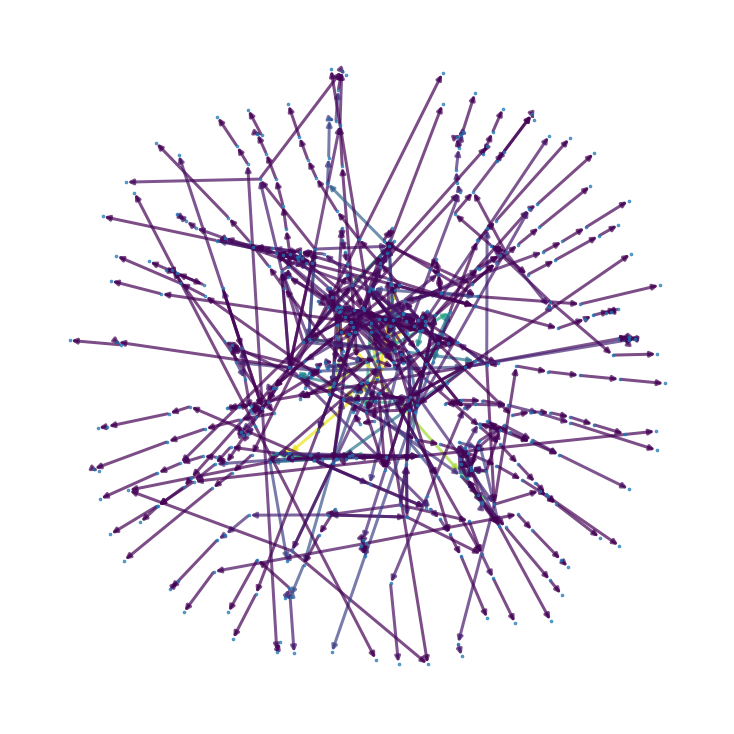

In [152]:
fig = plt.figure(figsize=(10,10))

max_count = int(max(list(counts.values())))

pos = nx.spring_layout(G)
nx.draw(
    G, 
    pos,
    node_size=7,
    edgelist=counts.keys(), 
    edge_color=counts.values(),
    width=3,
    alpha=0.7,
#     edge_cmap=plt.cm.spring,
)
plt.show()